In [1]:
import pandas as pd
df = pd.read_stata('karlan_list_2007.dta')

In [7]:
import matplotlib.pyplot as plt

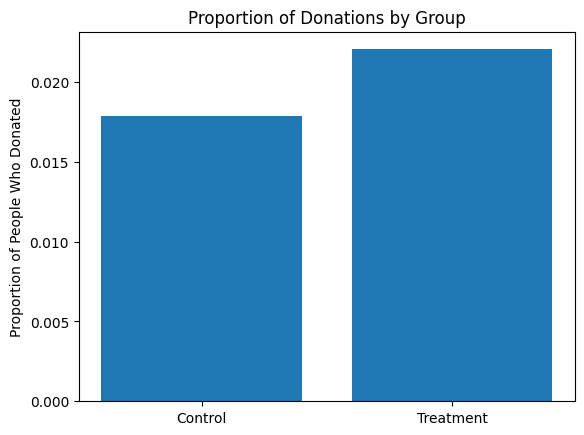

In [9]:
proportions = df.groupby('treatment')['gave'].mean().reset_index()

# Create a bar plot
plt.bar(proportions['treatment'], proportions['gave'], tick_label=['Control', 'Treatment'])
plt.ylabel('Proportion of People Who Donated')
plt.title('Proportion of Donations by Group')
plt.show()

In [12]:
from scipy import stats
import statsmodels.api as sm
treatment_donated = df[df['treatment'] == 1]['gave']
control_donated = df[df['treatment'] == 0]['gave']

# Perform a t-test
t_stat, p_value = stats.ttest_ind(treatment_donated, control_donated)
print(f"T-test results: t-statistic = {t_stat}, p-value = {p_value}")

# Perform a linear regression
df['intercept'] = 1
model = sm.OLS(df['gave'], df[['intercept', 'treatment']])
results = model.fit()
print("Linear regression results:")
print(results.summary())


T-test results: t-statistic = 3.101361000543946, p-value = 0.0019274025949016982
Linear regression results:
                            OLS Regression Results                            
Dep. Variable:                   gave   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     9.618
Date:                Thu, 11 Apr 2024   Prob (F-statistic):            0.00193
Time:                        11:55:08   Log-Likelihood:                 26630.
No. Observations:               50083   AIC:                        -5.326e+04
Df Residuals:                   50081   BIC:                        -5.324e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [20]:
df['intercept'] = 1

# Define the model and fit it
probit_model = sm.Probit(df['gave'], df[['intercept', 'treatment']])
probit_results = probit_model.fit()

# Print the summary of the regression results
print(probit_results.summary())

Optimization terminated successfully.
         Current function value: 0.100443
         Iterations 7
                          Probit Regression Results                           
Dep. Variable:                   gave   No. Observations:                50083
Model:                         Probit   Df Residuals:                    50081
Method:                           MLE   Df Model:                            1
Date:                Thu, 11 Apr 2024   Pseudo R-squ.:               0.0009783
Time:                        12:04:20   Log-Likelihood:                -5030.5
converged:                       True   LL-Null:                       -5035.4
Covariance Type:            nonrobust   LLR p-value:                  0.001696
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.1001      0.023    -90.073      0.000      -2.146      -2.054
treatment      0.0868      0.

In [21]:
df

,treatment,control,ratio,ratio2,ratio3,size,size25,size50,size100,sizeno,...,bluecty,pwhite,pblack,page18_39,ave_hh_sz,median_hhincome,powner,psch_atlstba,pop_propurban,intercept
0,0,1,Control,0,0,Control,0,0,0,0,...,1.0,0.446493,0.527769,0.317591,2.10,28517.0,0.499807,0.324528,1.000000,1
1,0,1,Control,0,0,Control,0,0,0,0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1,0,1,0,0,"$100,000",0,0,1,0,...,1.0,0.935706,0.011948,0.276128,2.48,51175.0,0.721941,0.192668,1.000000,1
3,1,0,1,0,0,Unstated,0,0,0,1,...,0.0,0.888331,0.010760,0.279412,2.65,79269.0,0.920431,0.412142,1.000000,1
4,1,0,1,0,0,"$50,000",0,1,0,0,...,1.0,0.759014,0.127421,0.442389,1.85,40908.0,0.416072,0.439965,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50078,1,0,1,0,0,"$25,000",1,0,0,0,...,1.0,0.872797,0.089959,0.257265,2.13,45047.0,0.771316,0.263744,1.000000,1
50079,0,1,Control,0,0,Control,0,0,0,0,...,1.0,0.688262,0.108889,0.288792,2.67,74655.0,0.741931,0.586466,1.000000,1
50080,0,1,Control,0,0,Control,0,0,0,0,...,0.0,0.900000,0.021311,0.178689,2.36,26667.0,0.778689,0.107930,0.000000,1
50081,1,0,3,0,1,Unstated,0,0,0,1,...,0.0,0.917206,0.008257,0.225619,2.57,39530.0,0.733988,0.184768,0.634903,1


In [28]:
match21 = df[df['ratio'] == 2]['gave']
match31 = df[df['ratio']== 3]['gave']
match11 = df[df['ratio'] == 1]['gave']

t_stat, p_value = stats.ttest_ind(match31, match21)
print(f"T-test results: t-statistic = {t_stat}, p-value = {p_value}")
t_stat, p_value = stats.ttest_ind(match11, match31)
print(f"T-test results: t-statistic = {t_stat}, p-value = {p_value}")
t_stat, p_value = stats.ttest_ind(match11, match21)
print(f"T-test results: t-statistic = {t_stat}, p-value = {p_value}")

T-test results: t-statistic = 0.05011583793874515, p-value = 0.9600305283739325
T-test results: t-statistic = -1.0150255853798622, p-value = 0.3101046637086672
T-test results: t-statistic = -0.96504713432247, p-value = 0.33453168549723933


In [40]:
probit_model = sm.OLS(df['gave'], df[['intercept', 'ratio2', 'ratio3']])
probit_results = probit_model.fit()
print(probit_results.summary())

                            OLS Regression Results                            
Dep. Variable:                   gave   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.117
Date:                Thu, 11 Apr 2024   Prob (F-statistic):             0.0163
Time:                        12:16:26   Log-Likelihood:                 26629.
No. Observations:               50083   AIC:                        -5.325e+04
Df Residuals:                   50080   BIC:                        -5.323e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0190      0.001     22.306      0.0